In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("3-customersatisfaction.csv")

In [4]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [6]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


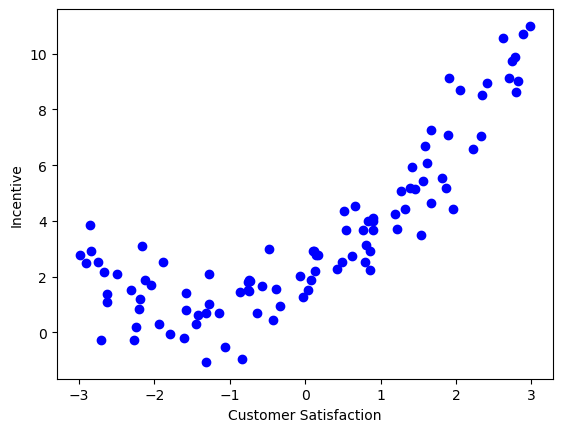

In [8]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color="b")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [9]:
# independent(x) and dependent(y) features
X =df[["Customer Satisfaction"]]
y = df["Incentive"]

In [10]:
# Train - Test Split (Train eğitimde kullanmak ve modeli oluşturmak için, Test modeli test etmek için)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train

array([[ 0.24763353],
       [ 1.45565669],
       [-0.54018267],
       [-0.7000392 ],
       [ 1.56862116],
       [ 0.98756838],
       [ 0.44864075],
       [ 1.54377517],
       [ 1.33219938],
       [-0.48041093],
       [ 0.39289296],
       [-0.65745669],
       [ 0.44266377],
       [-0.8721316 ],
       [-1.57257044],
       [-0.47018463],
       [-0.08360835],
       [-1.67090265],
       [-1.47554396],
       [-0.26670725],
       [-1.29927482],
       [ 0.02523769],
       [ 0.84556122],
       [-0.3215997 ],
       [ 0.0501141 ],
       [ 0.86053533],
       [-1.15064015],
       [-0.52347038],
       [-0.9488333 ],
       [ 0.46442017],
       [-0.46600711],
       [ 0.30711082],
       [-1.21262526],
       [ 1.07108903],
       [ 1.29604171],
       [-0.86064358],
       [ 0.67782396],
       [ 1.1293955 ],
       [-0.48194058],
       [ 0.90856014],
       [ 0.01384089],
       [ 0.87374067],
       [ 0.71021884],
       [-1.12668733],
       [-1.34723756],
       [ 1

In [14]:
X_test

array([[ 0.4039359 ],
       [ 0.0364053 ],
       [-0.77820868],
       [ 1.04680286],
       [-0.06217984],
       [ 0.83573973],
       [ 0.41798935],
       [-0.00396489],
       [ 0.78336234],
       [-1.36880313],
       [ 0.334334  ],
       [ 0.46526812],
       [-0.80095721],
       [-1.30198781],
       [ 0.6468811 ],
       [-1.25809961],
       [-1.71114869],
       [-1.54963478],
       [-0.02634742],
       [-0.95197018]])

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X_train, y_train)

LinearRegression()

In [17]:
# prediction

In [18]:
y_pred = reg.predict(X_test)

In [19]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("rmse: ", rmse)

mse:  2.717137277518106
rmse:  1.6483741315363165


In [22]:
r2 = r2_score(y_test, y_pred)
print("r2 score: ", r2)

r2 score:  0.2705652535622246


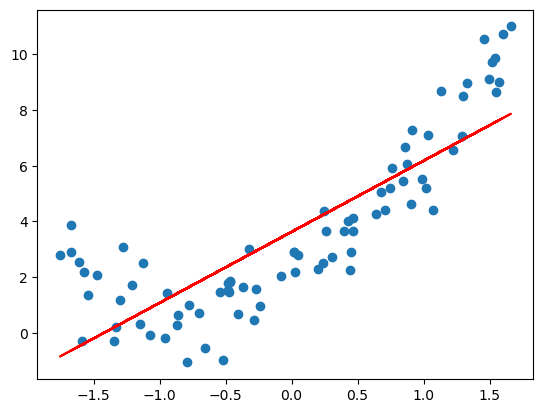

In [23]:
plt.scatter(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color="r")
plt.show()

In [24]:
poly = PolynomialFeatures()

In [25]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [26]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [27]:
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

In [30]:
y_pred = reg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7685687698788557


In [31]:
reg.coef_

array([0.        , 2.63871762, 1.54959954])

In [32]:
reg.intercept_

np.float64(2.076676429793282)

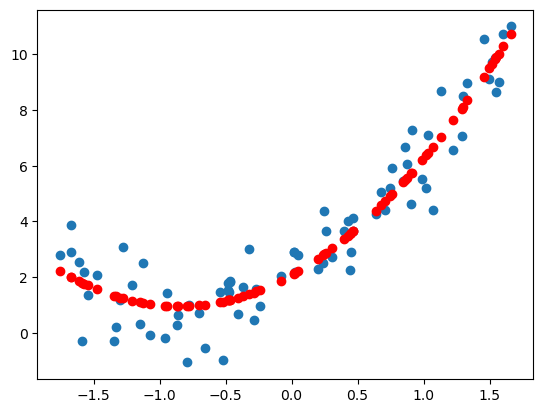

In [34]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, reg.predict(X_train_poly), color="r")
plt.show()

In [35]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [36]:
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(r2)

0.757344362140105


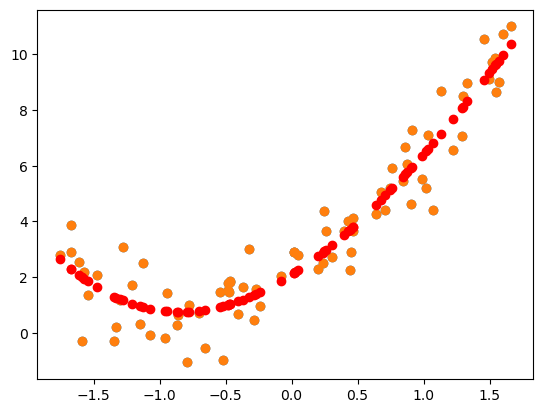

In [40]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, reg.predict(X_train_poly), color = "r")
plt.show()

In [38]:
# Degree'yi 2 de tutmanın daha mantıklı olduğunu gördük

In [41]:
# new data

In [42]:
new_df = pd.read_csv("3-newdatas.csv")

In [43]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [44]:
new_df.rename(columns = {"0": "Customer Satisfaction"}, inplace=True)

In [46]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [47]:
X_new = new_df[["Customer Satisfaction"]]

In [48]:
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [49]:
X_new = scaler.transform(X_new)

In [50]:
X_new_poly = poly.transform(X_new)

In [52]:
y_new = reg.predict(X_new_poly)

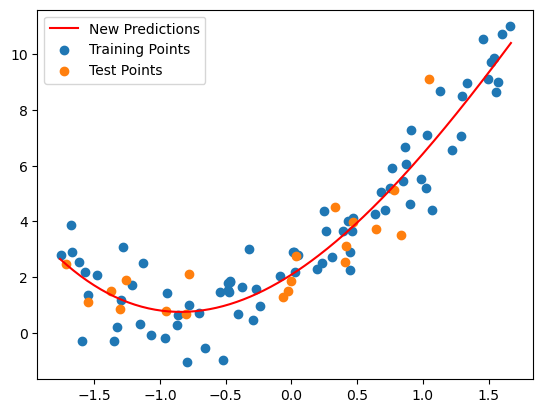

In [53]:
plt.plot(X_new, y_new, "r", label="New Predictions")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()

In [54]:
def poly_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("standard_scaler", scaler),
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label="Training Points")
    plt.scatter(X_test, y_test, label="Test Points")
    plt.legend()
    plt.show()

R2 score:  0.2705652535622246


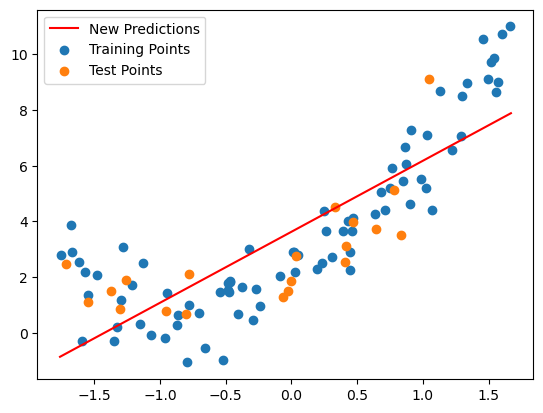

R2 score:  0.7685687698788558


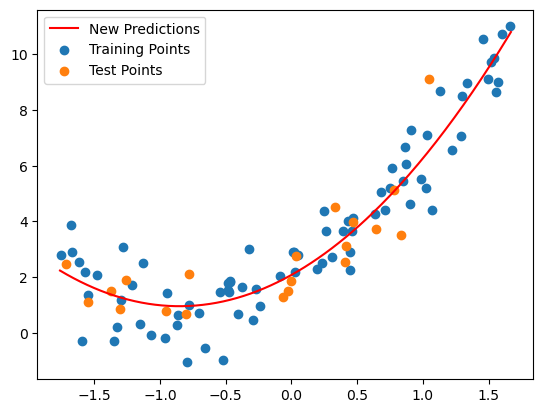

R2 score:  0.757344362140105


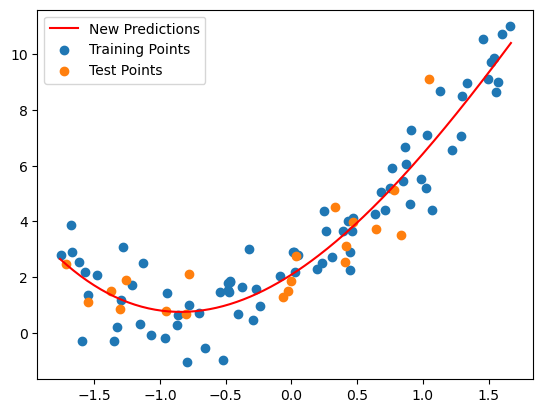

R2 score:  0.7355034443260413


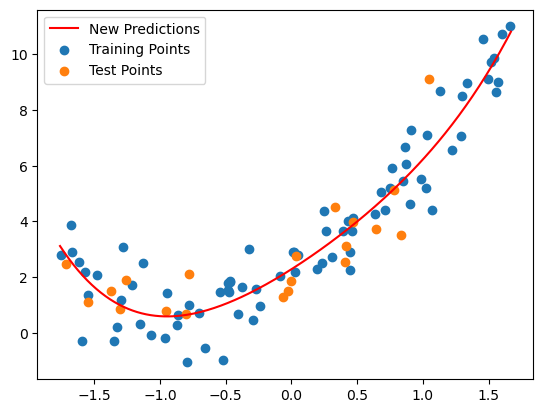

R2 score:  0.7351244165095399


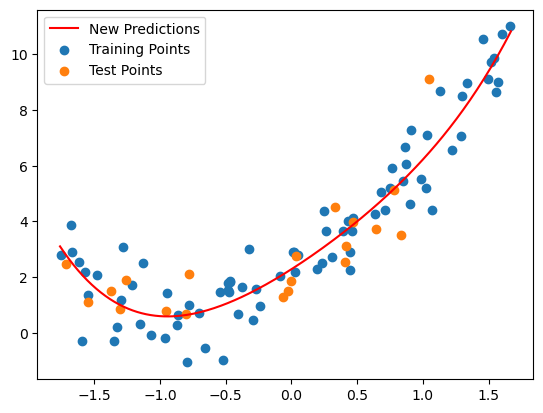

R2 score:  0.7343590482133429


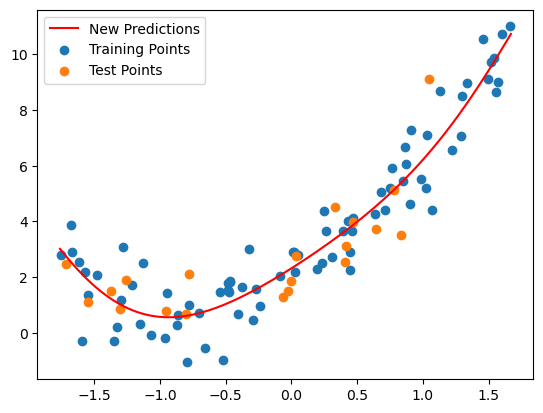

R2 score:  0.7347819263549453


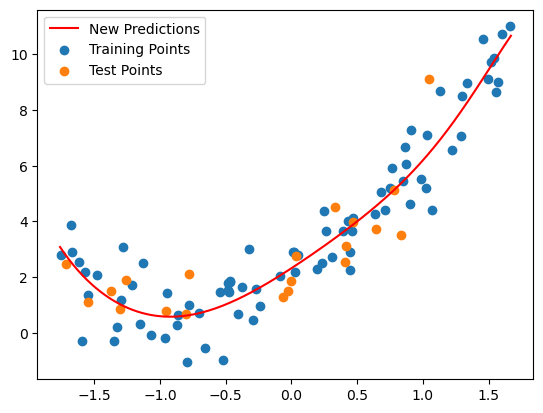

R2 score:  0.7411422099998382


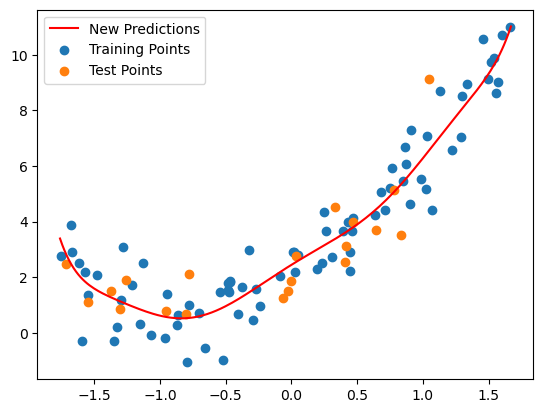

R2 score:  0.7310763879815942


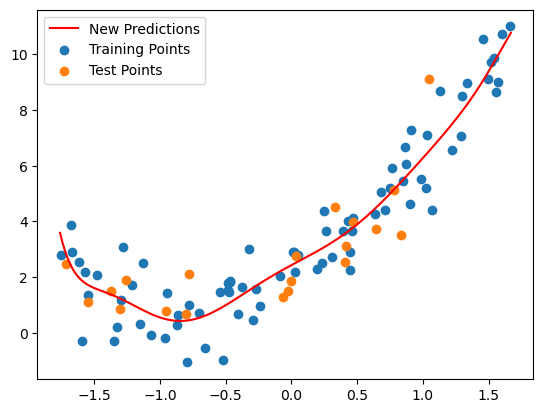

R2 score:  0.7280578621232846


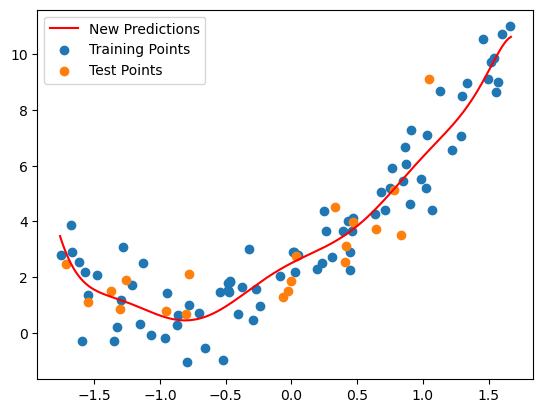

In [56]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)